<a href="https://colab.research.google.com/github/sarnio1/data-analytics-project/blob/main/RevoUMiniCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Introduction Variables

In [ ]:
a = 5

In [ ]:
b = 6

In [ ]:
print(a+b)

11


In [ ]:
c = 'this is string'

In [ ]:
print(c)

this is string


# Introduction to Looping

In [ ]:
print(a+0)
print(a+1)
print(a+2)

5
6
7


In [ ]:
for i in range(5):
  print(a+i)

5
6
7
8
9


# Read Data and Cleaning Data

In [ ]:
#how to read data in Google Sheets
sheet_url = 'https://docs.google.com/spreadsheets/d/1ibh9XTG8W1ZMv7CiRS4YnYIE7b9U0RGn9us_ATsuApw/edit#gid=1903509374'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)

df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1ibh9XTG8W1ZMv7CiRS4YnYIE7b9U0RGn9us_ATsuApw/export?format=csv&gid=1903509374


,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
 10  Revenue        1000 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB


In [ ]:
df.columns

Index(['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity', 'Revenue'],
      dtype='object')

In [ ]:
#change date type
df_cleaned = df.copy()

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned['Revenue'] = df_cleaned['Unit price'] * df_cleaned['Quantity']

print(df_cleaned.info())
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Payment        1000 non-null   object        
 2   Invoice ID     1000 non-null   object        
 3   Branch         1000 non-null   object        
 4   City           1000 non-null   object        
 5   Customer type  1000 non-null   object        
 6   Gender         1000 non-null   object        
 7   Product line   1000 non-null   object        
 8   Unit price     1000 non-null   float64       
 9   Quantity       1000 non-null   int64         
 10  Revenue        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 86.1+ KB
None


,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [ ]:
#check typo

df_cleaned['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [ ]:
df_cleaned['Gender'].value_counts()

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64

In [ ]:
for col_name in ['Payment', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line']:
       print(df_cleaned[col_name].value_counts(), '\n')

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 



In [ ]:
#replace typo
dict_typo = {'male':'Male',
             'female':'Female',
             'fml':'Female'}
df_replaced = df_cleaned.replace(dict_typo)
df_replaced.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [ ]:
df_cleaned['Gender'].value_counts()

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64

In [ ]:
df_replaced['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [ ]:
#check duplicated data

df_replaced['Invoice ID'].duplicated()
df_replaced['Invoice ID'].duplicated().sum()

0

# EDA

## Daily Trend Overall

In [ ]:
agg_daily = df_replaced.groupby('Date', as_index=False)['Quantity', 'Revenue'].sum()
agg_daily.head()

<ipython-input-113-20302d107e11>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_daily = df_replaced.groupby('Date', as_index=False)['Quantity', 'Revenue'].sum()


,Date,Quantity,Revenue
0,2019-01-01,81,4519.22
1,2019-01-02,48,1852.86
2,2019-01-03,37,1979.17
3,2019-01-04,32,1546.37
4,2019-01-05,55,3368.27


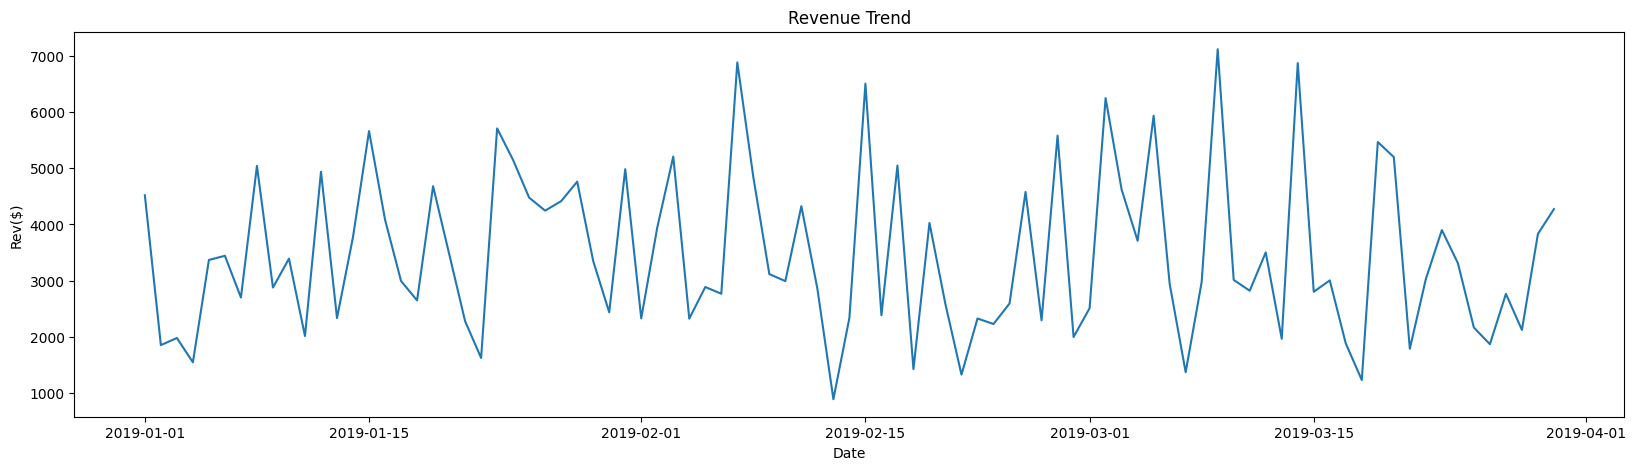

In [ ]:
#draw line plot using matplotlib

plt.rcParams["figure.figsize"] = (20,5)

plt.plot('Date', 'Revenue', data = agg_daily)
plt.title('Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Rev($)')
plt.show()

the revenue data has seasonality.

<Axes: xlabel='Date', ylabel='Quantity'>

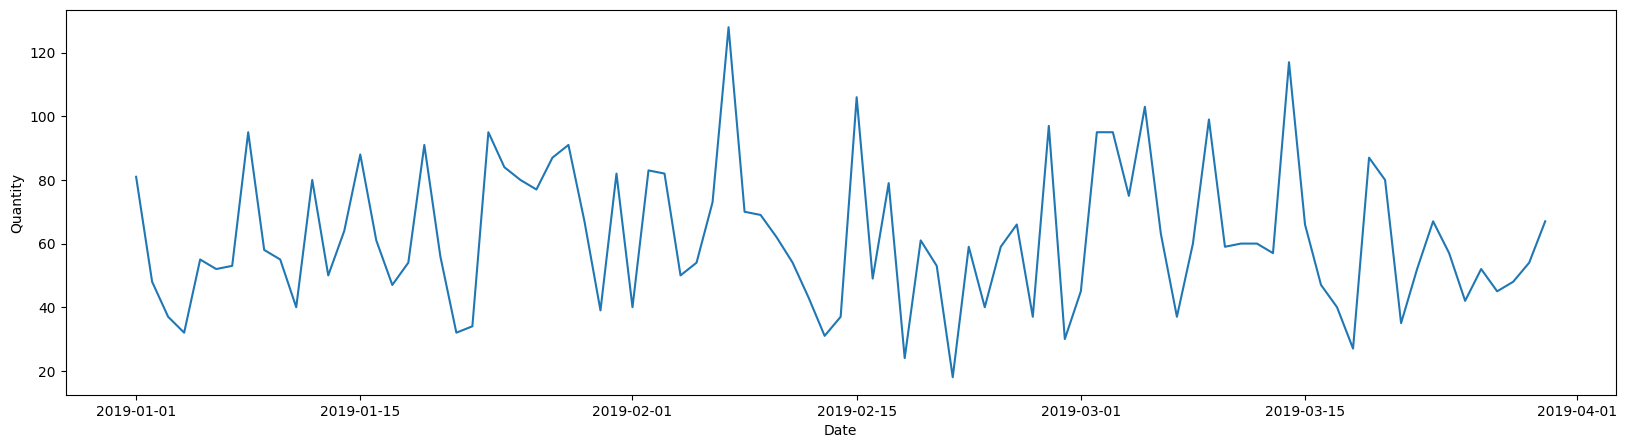

In [ ]:
#draw line plot using seaborn

sns.lineplot(data=agg_daily,x='Date',y='Quantity')

##By Payment

In [ ]:
agg_payment = df_replaced.groupby('Payment', as_index=False).agg({'Revenue':'sum', 'Invoice ID':'nunique'})
agg_payment.head()

,Payment,Revenue,Invoice ID
0,Cash,106863.40,344
1,Credit card,95968.64,311
2,Ewallet,104755.34,345


<Axes: xlabel='Payment', ylabel='Revenue'>

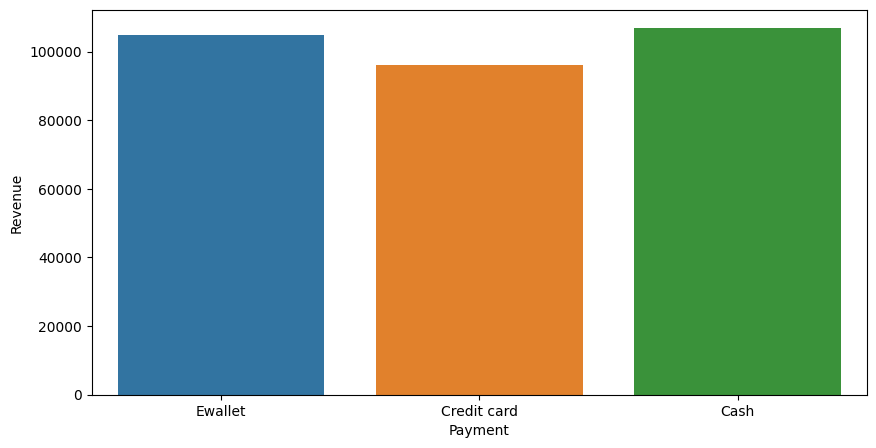

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(data = agg_payment.sort_values('Payment', ascending=False), x='Payment', y='Revenue')

The highest revenue comes from cash.

<Axes: xlabel='Payment', ylabel='Invoice ID'>

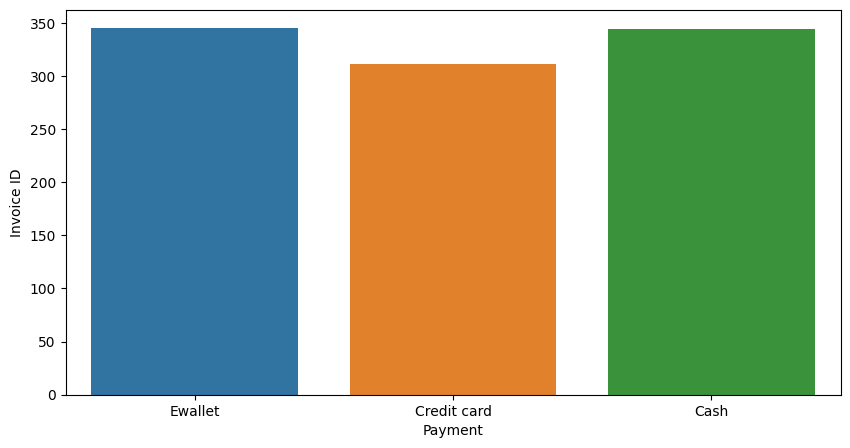

In [ ]:
sns.barplot(data = agg_payment.sort_values('Payment', ascending=False), x='Payment', y='Invoice ID')

But, the highest revenue based on count transaction comes from ewallet.

([<matplotlib.patches.Wedge at 0x78224e32c2e0>,
 [Text(0.5073032188378986, 0.976034550698236, 'Cash'),
  Text(-1.0997450371451651, -0.023682340986048763, 'Credit card'),
  Text(0.5281991633287692, -0.9648863372743903, 'Ewallet')],
 [Text(0.27671084663885376, 0.5323824821990377, '34.7%'),
  Text(-0.5998609293519083, -0.012917640537844778, '31.2%'),
  Text(0.288108634542965, -0.5263016385133037, '34.1%')])

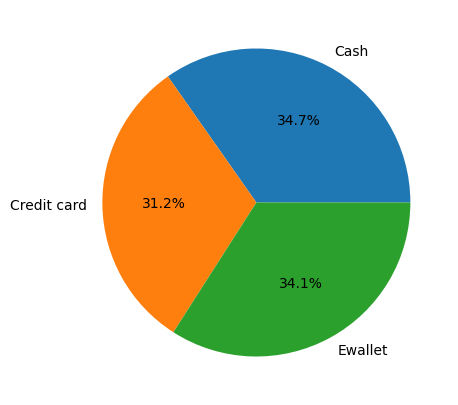

In [ ]:
plt.pie(agg_payment['Revenue'], labels = agg_payment['Payment'], autopct='%.1f%%')

The revenue comes mainly from cash transactions which is 34.7% and it's the highest among the other payment methods (credit card 31.2%, ewallet 34.1%).

#By Gender and By Product

Note: My internet was unstable at this step and i couldn't find where the week 1 day 3 video is, so I just follow the previous pattern: create charts and then export the file in .csv format.

In [ ]:
agg_gender = df_replaced.groupby('Gender', as_index=False).agg({'Revenue':'sum', 'Invoice ID':'nunique'})
agg_gender.head()

,Gender,Revenue,Invoice ID
0,Female,159888.50,501
1,Male,147698.88,499


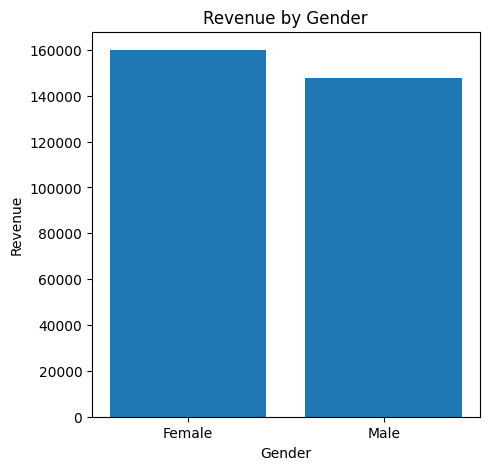

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)

plt.bar('Gender', 'Revenue', data = agg_gender)
plt.title('Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Revenue')
plt.show()

<Axes: xlabel='Gender', ylabel='Revenue'>

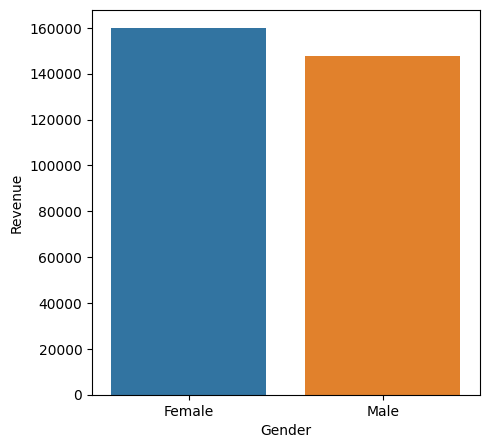

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)

sns.barplot(data=agg_gender.sort_values('Revenue', ascending=False), x='Gender', y='Revenue')

In [ ]:
#export file

from google.colab import files
df_replaced.to_csv('Supermarket Sales_Python Course.csv')
files.download('Supermarket Sales_Python Course.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'.sort_values('col_name', ascending=False) is not working. Could you help me? Thank you fol all RevoU Team! 😀